In [1]:
library(dplyr)
library(stringr)
library(KoNLP)
library(wordcloud)
library(RColorBrewer)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'stringr' was built under R version 3.6.3"
Checking user defined dictionary!


Warning message:
"package 'wordcloud' was built under R version 3.6.3"
Loading required package: RColorBrewer



In [2]:
# 데이터로드

twitter <- read.csv("twitter.csv",
                   header = T,
                   stringsAsFactors = F,
                   fileEncoding = "UTF-8")
twitter

X,번호,계정이름,작성일,내용
1,1,ahkorea,11/2/2011,민주당의 ISD관련 주장이 전부 거짓으로 속속 드러나고있다. 미국이 ISD를 장악하고 있다고 주장하지만 중재인 123명 가운데 미국인은 10명뿐이라고 한다.
2,2,parkkeewoo,12/30/2011,"말로만 '미제타도', 사실은 '미제환장'! 김정일 운구차가 링컨 컨티넬탈이던데 북한의 독재자나 우리나라 종북들이나 겉으로는 노동자, 서민을 대변한다면서 고급 외제차, 아이팟에 자식들 미국 유학에 환장하는 위선자들인거죠"
3,3,zndvn33,1/5/2012,한나라당이 보수를 버린다네요 뭔가착각하는모냥인에 국민들이보수를싫어하는게 아니라뻘짓거리하는분들을싫어하는겁니다야당이진보어쩌고저쩌고한다고해서그들을조아한다고생각하면대착각
4,4,hong_jihee77,1/23/2012,"FTA를 대하는 현명한 자세! 사실 자유주의 경제의 가장 큰 수해자는 한국이죠. 농어업분야 피해를 줄이는 정부대안을 최대한, 보완하고 일자리 창출 등 실익을 최대화해 나가는게 현실적인 대처자세일듯!"
5,5,ceasar1000,2/5/2012,곽노현씨 갈수록 가관입니다. 뇌물질에 아들 병역 의혹까지. 도대체 아이들이 뮐 보고 배우겠습니까? 이래도 자리 연연하시겠습니까?
6,6,sunsetyellowsky,2/13/2012,"과거 집권시 한미FTA를 적극 추진하던 세력이 이제 집권하면 폐기하겠다고 주장합니다. 어이없어 말도 안 나오네요. 표만 얻을 수 있다면 국가 안보나 경제가 어떻게 되든 상관없다는 무책임한 행태들, 우리 정치의 후진성을 드러내는 거죠."
7,7,snailcharm,2/22/2012,"한미 FTA가 발효되면 대한민국은 단일 국가로는 세계 최대 시장인 미국과 시장을 공유하는 아시아 첫 국가가 되는군요. 이게 간단하고, 보통스런 이런 아니지. 대단한 거지."
8,8,type0789,2/23/2012,한미 FTA가 발효되면 대한민국은 단일 국가로는 세계 최대 시장인 미국과 시장을 공유하는 아시아 첫 국가가 된다.^^
9,9,modular2,2/29/2012,"2012년도 서울시 증등교사 임용고시 경쟁률이 평균 12:1이던데 아는지 곽노현 교육감이 전교조 출신 교사 특채 인사 계획을 재고 요청한다니...규정, 상식도 없이 인사권을 남용 하는걸 보니 2심재판에서 감옥에 갈것로 마음을 굳혔나 봅니다."
10,10,type0789,3/14/2012,"RT @###e0789: RT @###kiSong한미FTA 발효가 코 앞으로 다가와있네요 글로벌 무역허브 국가로 등장한 한국의 도전을 세계가 주시하고 있는 만큼, 우리나라가 하루빨리 큰 결실을 맺을 수 있.."


In [3]:
# 변수명 수정
twitter <- rename(twitter, no = 번호, id = 계정이름, date = 작성일, tw = 내용)

# 특수문자 제거
twitter$tw <- str_replace_all(twitter$tw, "\\W", " ")

## 단어 빈도표 만들기

In [4]:
# 트윗에서 명사추출
nouns <- extractNoun(twitter$tw)

# 추출한 명사 list를 문자열 벡터로 변환, 단어별 빈도표 생성
wordcount <- table(unlist(nouns))

# 데이터 프레임으로 변환
df_word <- as.data.frame(wordcount, stringsAsFactors = F)

# 변수명 수정
df_word <- rename(df_word, word = Var1, freq = Freq)

In [5]:
# 두 글자 이상 단어만 추출
df_word <- filter(df_word, nchar(word)>= 2)

# 상위 20개 추출
top20 <- df_word  %>% 
    arrange(desc(freq))  %>% 
    head(20)

top20

word,freq
종북,2431
북한,2216
세력,1162
좌파,829
대한민국,804
우리,780
들이,566
국민,550
친북,430
단체,394


## 단어 빈도 막대 그래프 만들기

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


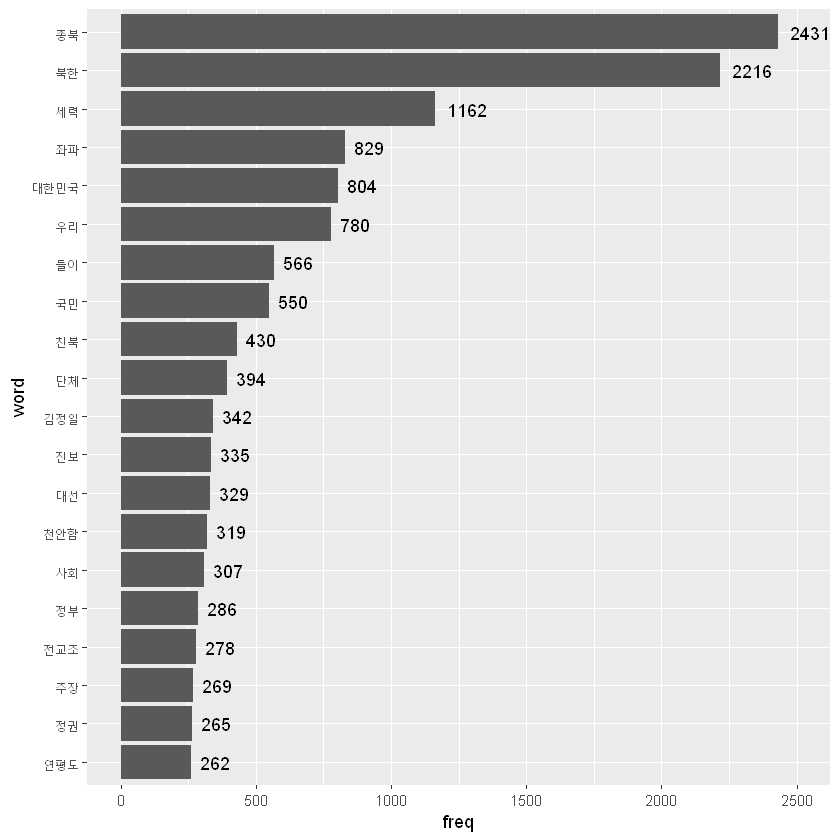

In [6]:
library(ggplot2)

# 빈도 순서 변수 생성
order <- arrange(top20, freq)$word

ggplot(data = top20, aes(x = word, y = freq)) +
    ylim(0, 2500) +
    geom_col() +
    coord_flip() +
    scale_x_discrete(limit = order) +               # 빈도수 막대 정렬
    geom_text(aes(label = freq), hjust = -0.3)      # 빈도 표시

## 워드 클라우드 만들기

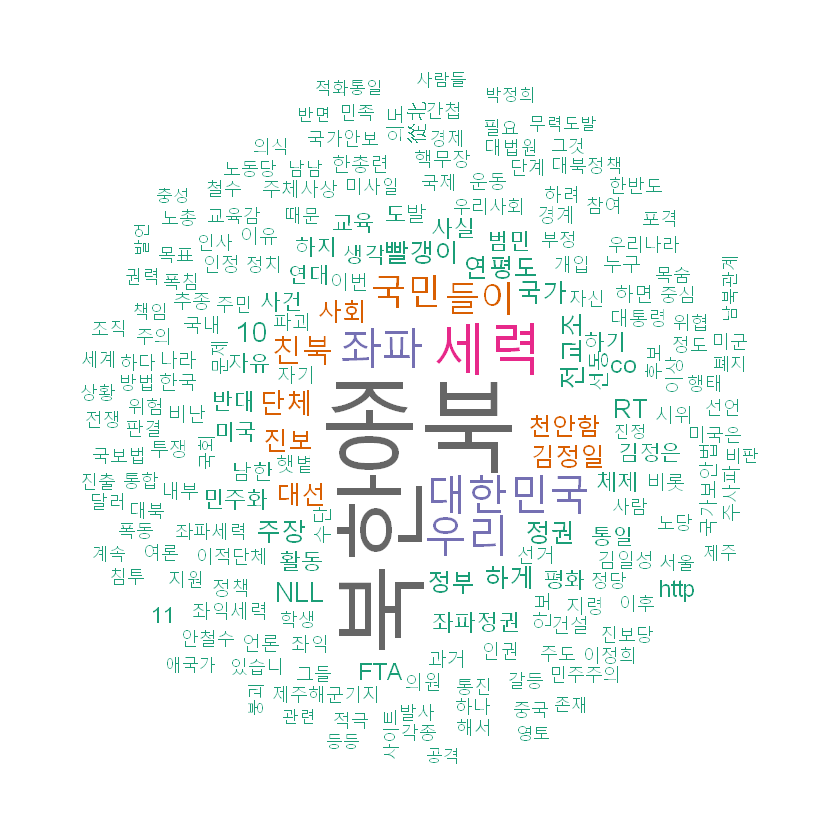

In [28]:
# 색상 목록 생성
pal <- brewer.pal(8, "Dark2")

# 난수 고정
set.seed(1234)

wordcloud(word = df_word$word,    # 단어
          freq = df_word$freq,    # 빈도
          min.freq = 10,          # 최소 빈도 단어
          max.words = 200,        # 표현 단어 수
          random.order = F,       # 고빈도 단어 중앙 배치
          rot.per = .1,           # 회전 단어 비율
          scale = c(6, 1),     # 단어 크기 범위
          colors = pal)           # 색상 목록



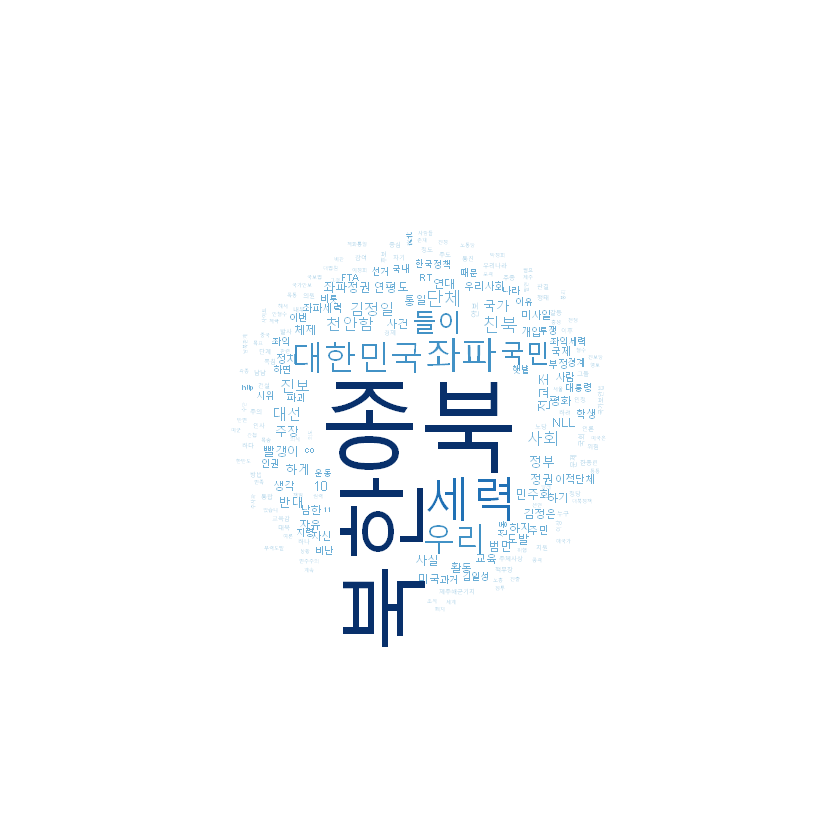

In [25]:
# 색상 목록 생성
pal <- brewer.pal(9, "Blues")[5:9]

# 난수 고정
set.seed(1234)

wordcloud(word = df_word$word,    # 단어
          freq = df_word$freq,    # 빈도
          min.freq = 10,          # 최소 빈도 단어
          max.words = 200,        # 표현 단어 수
          random.order = F,       # 고빈도 단어 중앙 배치
          rot.per = .1,           # 회전 단어 비율
          scale = c(6, 0.2),      # 단어 크기 범위
          colors = pal)           # 색상 목록

